<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/ex0627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7 Practice: Making maps with R

1. Load the `ggplot2`, `dplyr` and `maps` packages and save the world map data frame into the variable `map_world`. (Hint: Look at this PDF[https://cran.r-project.org/web/packages/maps/maps.pdf] for hints on where the world map data frame is saved.)
`ggplot2`、`dplyr`、`maps`パッケージをロードし、世界地図データフレームを変数`map_world`に保存せよ。(ヒント：世界地図データフレームがどこに保存されているかのヒントは、このPDF[https://cran.r-project.org/web/packages/maps/maps.pdf]を見よ)。


In [24]:
library(tidyverse)
if(!require(maps)) install.packages("maps")
library(maps)
map_world <- map_data("world")

In [6]:
str(map_world)

'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


2. Plot the world map, ensuring that the aspect ratio of the map is correct and that the countries have white fill and black outline.
世界地図をプロットし、地図のアスペクト比が正しいこと、国の塗りが白で輪郭が黒であることを確認せよ。

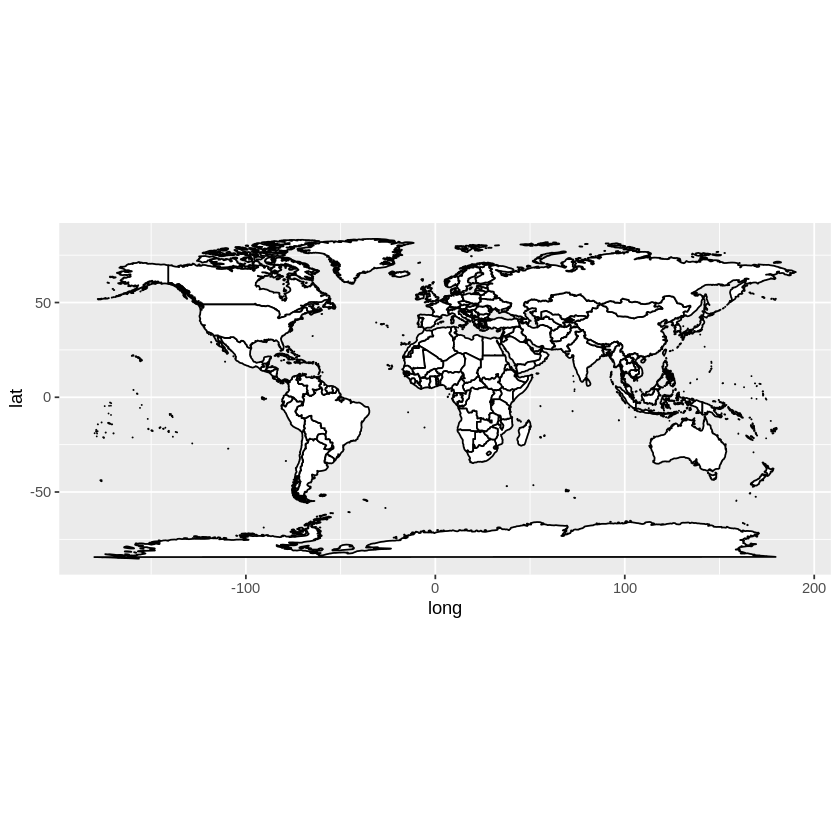

In [26]:
ggplot() +
    geom_polygon(data = map_world, mapping = aes(x = long, y = lat, group=group), col = "black", fill = "white")+
    coord_quickmap()

3. Save the coordinates for just the region “China” in the variable `map_china`. Plot with the same settings as above, except that in addition, we don’t see the latitude and longitude axes.
地域「中国」だけの座標を変数`map_china`に保存せよ。さらに緯度と経度の軸を除いて、上と同じ設定でプロットせよ。

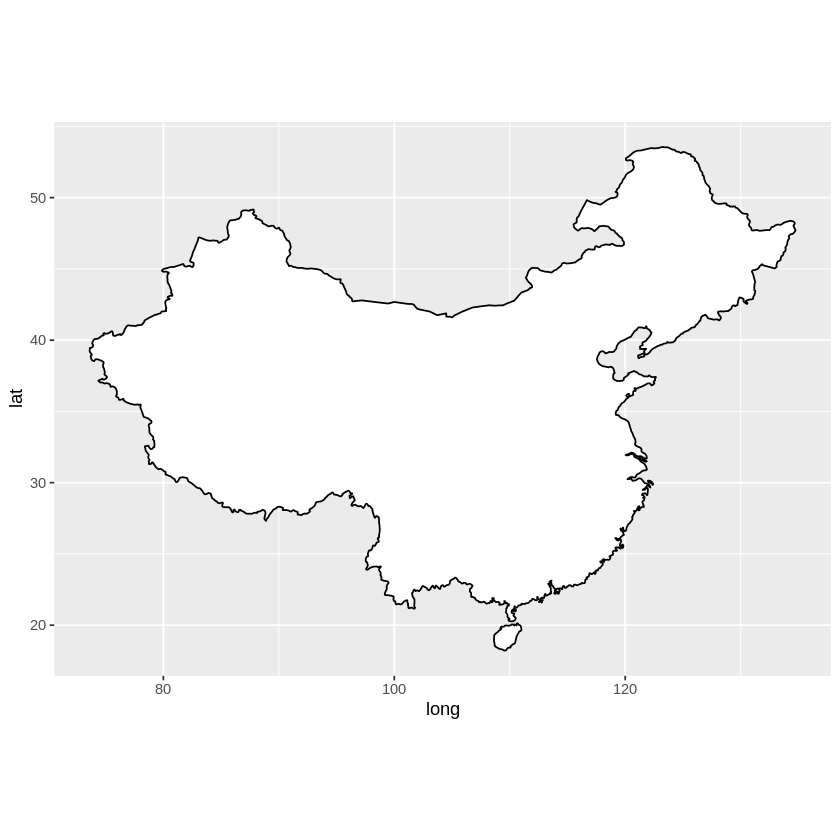

In [28]:
map_world %>% filter(region == "China") -> map_china
map_theme <- theme(
    axis.title.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.y  = element_blank(),
    axis.ticks.y = element_blank()
)
map_china %>% ggplot() +
    geom_polygon(mapping = aes(x = long, y = lat, group=group), col = "black", fill = "white")+
    coord_quickmap()

4. Load US state-level data into the variable `map_state`. Plot just the states of California, Oregon and Washington.
アメリカの州レベルのデータを変数`map_state`にロードし，カリフォルニア州、オレゴン州、ワシントン州だけをプロットせよ。（ヒント，`map_data("state")`を読み込む）


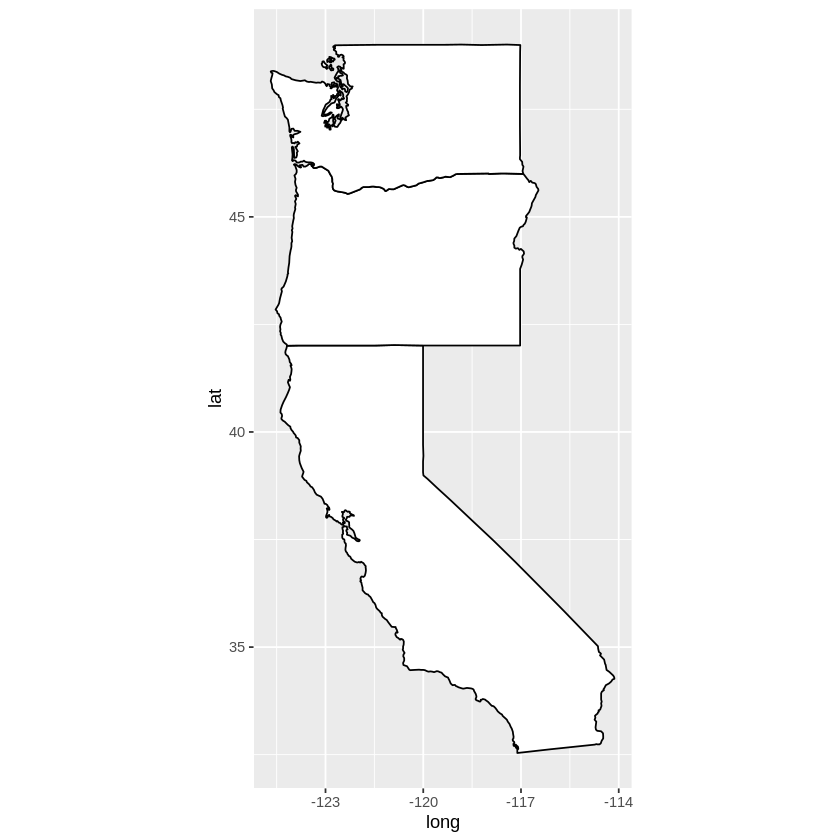

In [32]:
map_state <- map_data("state")
map_state %>% filter(region %in% c("california", "oregon", "washington")) %>%
  ggplot() +
    geom_polygon(mapping = aes(x = long, y = lat, group=group), col = "black", fill = "white")+
    coord_quickmap()

5. Load the `datasets` package. (The `datasets` package contains variables `state.name` and `state.division` which we will use.) Create a data frame named `division` such that the first column `region` contains `state.name` in lower case, and the second column `division` contains `state.division`.
`datasets`パッケージをロードせよ。(`datasets`パッケージには変数`state.name`と`state.division`があり、これを使う)。最初の列 `region` に小文字の `state.name` が含まれ、2番目の列 `division` に `state.division` が含まれるように、`division` という名前のデータフレームを作成せよ．


In [34]:
library(datasets)
division <- data.frame(region = tolower(state.name), division = state.division)
head(division)

,region,division
,<chr>,<fct>
1,alabama,East South Central
2,alaska,Pacific
3,arizona,Mountain
4,arkansas,West South Central
5,california,Pacific
6,colorado,Mountain


6. Join `division` to `map_state` (with `map_state` on the left) on the key `region`.
`division`を`map_state`に（`map_state`を左にして）キーの`region`で結合せよ。

In [ ]:
map_state %>% left_join(division, by = "region")

7. Plot a map of the US at state-level, with the fill of the states indicating the division it belongs to.
州の塗りつぶしが属する部門を示すように、州レベルでアメリカの地図をプロットせよ。

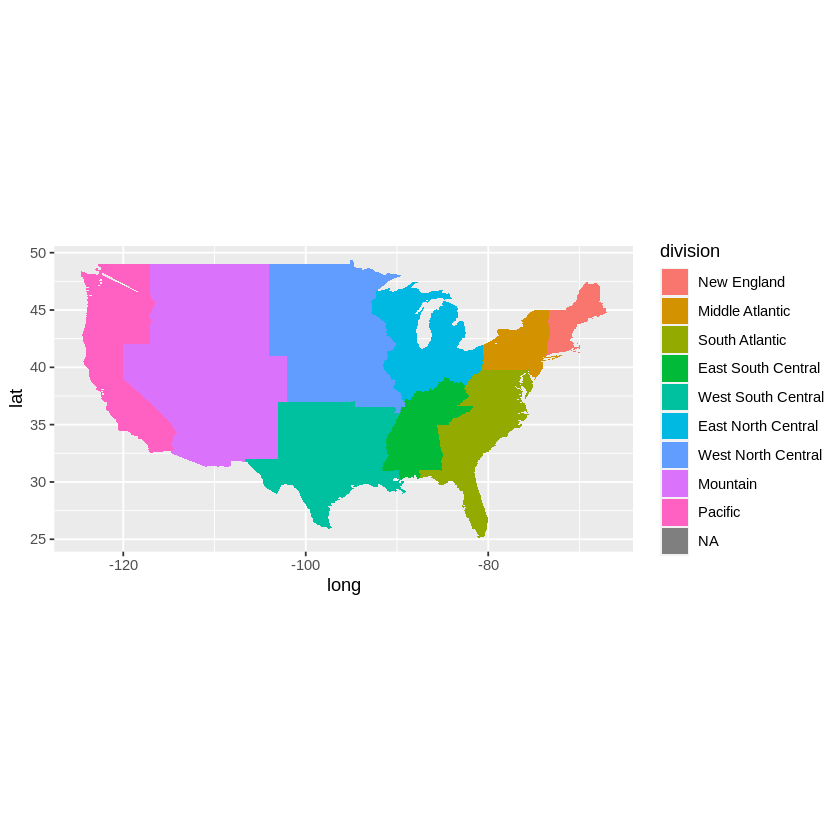

In [37]:
map_state %>% left_join(division, by = "region") %>%
  ggplot() +
  geom_polygon(aes(x = long, y = lat, group = region, fill = division)) +
    coord_quickmap()

8. Figure out why there is an NA in the legend in the map resulting from Question 7. Modify the data frame so that the NA is not included.
設問 7 の結果の地図の凡例に `NA` がある理由を解明しなさい。`NA` が含まれないようにデータフレームを修正せよ。

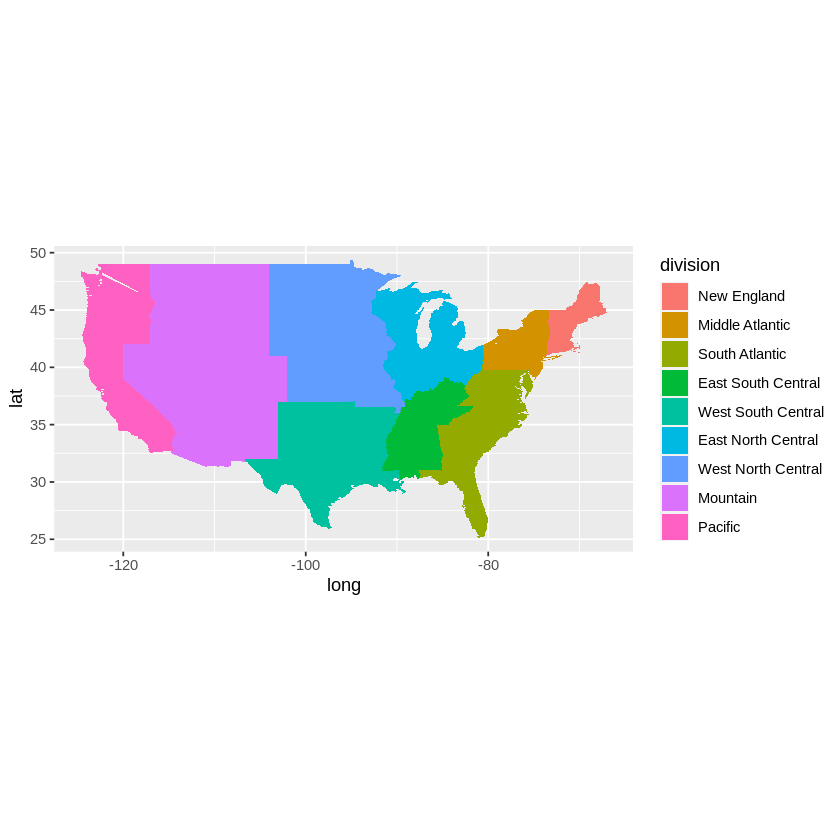

In [38]:
map_state2 %>% filter(!is.na(division)) %>%
    ggplot() +
        geom_polygon(aes(x = long, y = lat, group = region, fill = division)) +
        coord_quickmap()

9. Augment the map from Question 7 with state abbreviations in the center of the map, using state.abb and state.center to help you. (Hint: Combine state.abb and state.center into an auxiliary data frame first.)
`state.abb`と`state.center`を使って、設問7のマップの中央に州の略称を追加せよ。(ヒント: `state.abb`と`state.center`をまず補助データフレームにまとめる)

In [42]:
state.abb

[1] "AL" "AK" "AZ" "AR" "CA" "CO" "CT" "DE" "FL" "GA" "HI" "ID" "IL" "IN" "IA"
[16] "KS" "KY" "LA" "ME" "MD" "MA" "MI" "MN" "MS" "MO" "MT" "NE" "NV" "NH" "NJ"
[31] "NM" "NY" "NC" "ND" "OH" "OK" "OR" "PA" "RI" "SC" "SD" "TN" "TX" "UT" "VT"
[46] "VA" "WA" "WV" "WI" "WY"

In [43]:
state.center

$x
 [1]  -86.7509 -127.2500 -111.6250  -92.2992 -119.7730 -105.5130  -72.3573
 [8]  -74.9841  -81.6850  -83.3736 -126.2500 -113.9300  -89.3776  -86.0808
[15]  -93.3714  -98.1156  -84.7674  -92.2724  -68.9801  -76.6459  -71.5800
[22]  -84.6870  -94.6043  -89.8065  -92.5137 -109.3200  -99.5898 -116.8510
[29]  -71.3924  -74.2336 -105.9420  -75.1449  -78.4686 -100.0990  -82.5963
[36]  -97.1239 -120.0680  -77.4500  -71.1244  -80.5056  -99.7238  -86.4560
[43]  -98.7857 -111.3300  -72.5450  -78.2005 -119.7460  -80.6665  -89.9941
[50] -107.2560

$y
 [1] 32.5901 49.2500 34.2192 34.7336 36.5341 38.6777 41.5928 38.6777 27.8744
[10] 32.3329 31.7500 43.5648 40.0495 40.0495 41.9358 38.4204 37.3915 30.6181
[19] 45.6226 39.2778 42.3645 43.1361 46.3943 32.6758 38.3347 46.8230 41.3356
[28] 39.1063 43.3934 39.9637 34.4764 43.1361 35.4195 47.2517 40.2210 35.5053
[37] 43.9078 40.9069 41.5928 33.6190 44.3365 35.6767 31.3897 39.1063 44.2508
[46] 37.5630 47.4231 38.4204 44.5937 43.0504

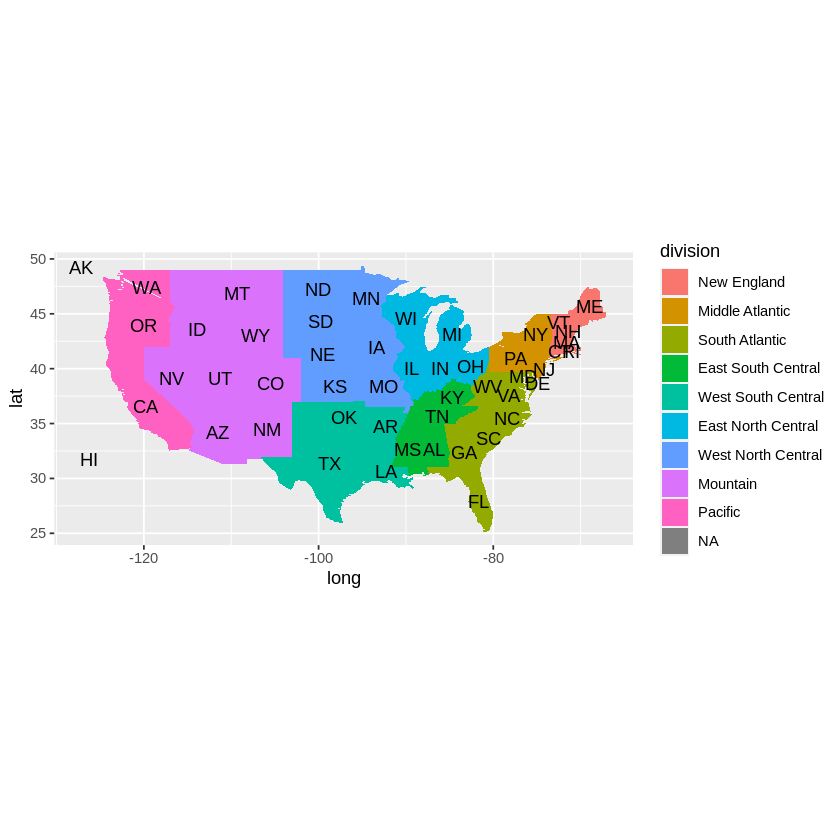

In [41]:
state_name <- data.frame(abb = state.abb, x = state.center$x, y = state.center$y)
ggplot() +
    geom_polygon(data = map_state2,
                 aes(x = long, y = lat, group = region, fill = division)) +
    geom_text(data = state_name, aes(x = x, y = y, label = abb)) +
    coord_quickmap()

10. You may have noticed that the state abbreviations for Hawaii and Alaska were included, even though they were not drawn. (This of course depends on how you drew the map in Question 9.) Redo the map above, but without plotting the abbreviations for these two states.
ハワイとアラスカの州略号が、描かれていないにもかかわらず含まれていることに気づいたかもしれない。(これはもちろん、設問9でどのように地図を描いたかによる。) この2つの州の略語はプロットしないで，上の地図をやり直せ．

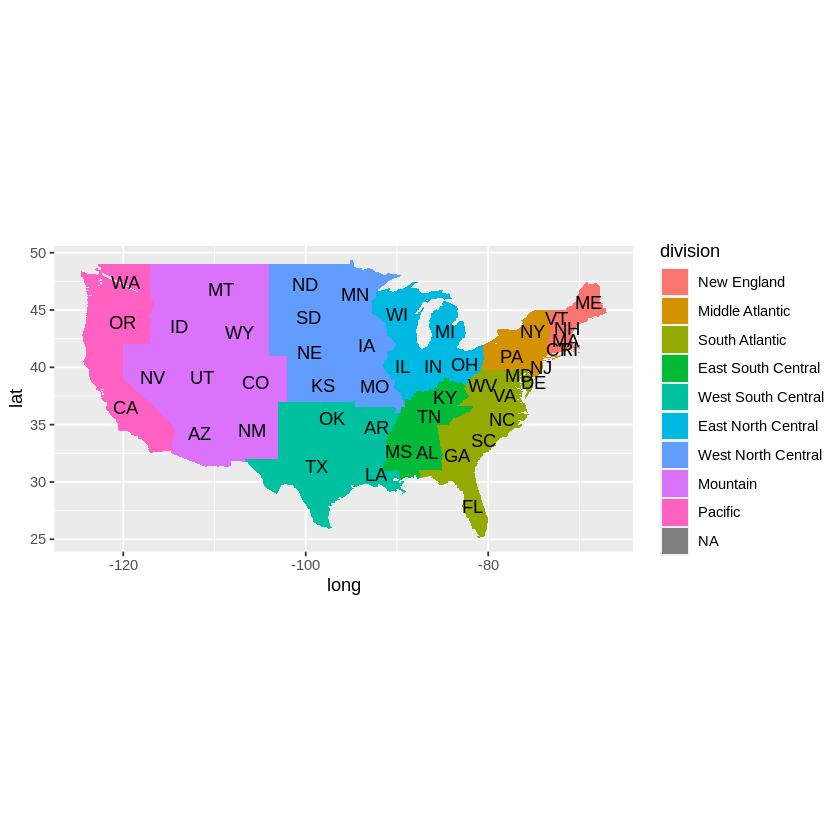

In [44]:
state_name2 <- state_name %>% filter(abb != "HI" & abb != "AK")
ggplot() +
    geom_polygon(data = map_state2,
                 aes(x = long, y = lat, group = region, fill = division)) +
    geom_text(data = state_name2, aes(x = x, y = y, label = abb)) +
    coord_quickmap()